Integral aproximada = 9.568136284942158


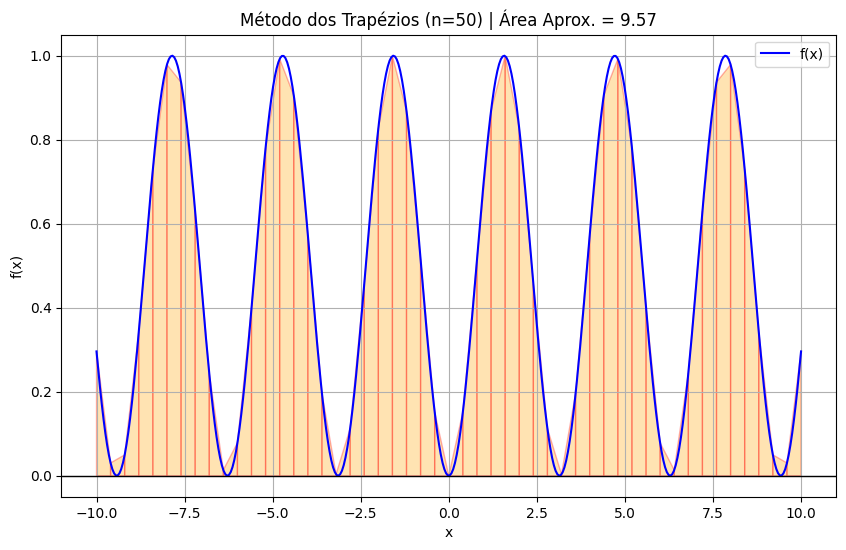

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
from typing import Callable

def integral_trapézio(func:Callable[[float],float], pi:float, pf:float, n:int) -> float:
    """
    Aplica o método da Regra do Trapézio Composta para encontrar uma aproximação da integral de f(x) 
    no intervalo [pi, pf]. Para isso, o intervalo é dividido em n subintervalos de tamanho igual e em cada 
    um deles é construído um trapézio que aproximará a área sob o gráfico de f(x) naquela parte.

    Args:
        func (Callable[[float], float]): Função f(x).
        pi (float): Limite inferior do intervalo.
        pf (float): Limite superior do intervalo.
        n (int): Número de subdivisões trapezoidais.

    Returns:
        float: Aproximação da integral de f(x) = 0.

    Raises:
        TypeError: Se um dos seguintes casos ocorrer:
            - func não for uma função chamável 
            - pi e pf não forem float 
            - n não for inteiro           
    """
    if not callable(func):
        raise TypeError("'func' deve ser uma função chamável")
    if not isinstance(pi, (int, float)) or not isinstance(pf, (int, float)):
        raise TypeError("'pi' e 'pf' devem ser números (int ou float)")
    if not isinstance(n, int):
        raise TypeError("'n' deve ser um inteiro")
    h = (pf - pi) / n
    pontos = [pi + h*i for i in range(n+1)]
    
    # Cálculo da integral com regra do trapézio
    area = reduce(lambda acc, i: acc + (func(pontos[i]) + func(pontos[i+1])) * h / 2, range(n), 0)

    return area

f = lambda x: np.sin(x)**2
resultado = integral_trapézio(f, -10, 10, 50)
print(f"Integral aproximada = {resultado}")

def plot_func_trapezio(func:Callable[[float],float], pi:float, pf:float, n:int):
    '''
    Esta função cria uma visualização do gráfico de f(x) e da aproximação da sua área
    por meio da função 'integral_trapezio', sombreando as n subdivisões trapezoidais.
    
    Args:
        func (Callable[[float], float]): Função f(x).
        pi (float): Limite inferior do intervalo.
        pf (float): Limite superior do intervalo.
        n (int): Número de subdivisões trapezoidais.

    Returns:
        float: Aproximação da integral de f(x) = 0.

    Raises:
        TypeError: Se um dos seguintes casos ocorrer:
            - func não for uma função chamável 
            - pi e pf não forem float 
            - n não for inteiro
    '''
    if not callable(func):
        raise TypeError("'func' deve ser uma função chamável")
    if not isinstance(pi, (int, float)) or not isinstance(pf, (int, float)):
        raise TypeError("'pi' e 'pf' devem ser números (int ou float)")
    if not isinstance(n, int):
        raise TypeError("'n' deve ser um inteiro")
    
    h = (pf - pi) / n
    pontos = [pi + h*i for i in range(n+1)]
    area = integral_trapézio(func, pi, pf, n)
    # Gerar pontos para desenhar a curva da função
    x = np.linspace(pi, pf, 400)
    y = func(x)

    plt.figure(figsize=(10,6))
    plt.plot(x, y, 'b', label='f(x)')  # Curva da função
    plt.axhline(0, color='black', linewidth=1)

    # Desenhar trapézios
    for i in range(n):
    
        x_trap = [pontos[i], pontos[i], pontos[i+1], pontos[i+1]]
        y_trap = [0, func(pontos[i]), func(pontos[i+1]), 0]
        plt.fill(x_trap, y_trap, 'orange', alpha=0.3, edgecolor='r')

    plt.title(f"Método dos Trapézios (n={n}) | Área Aprox. = {area:.2f}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_func_trapezio(f, -10, 10, 50)
    